# **Laboratorio Bordes y Contornos**
**José Barrios - 20007192**

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

## Problema 1
Realice una comparación entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV y cualquier imagen, como entregable debe mostrar una comparación entre los tres enfoques con una tabla donde se muestre las ventajas y desventajas de cada enfoque.

In [21]:
def p1Bordes(carpeta, imagen, resultado):
    #Leer imagen en escala de grises
    img = cv2.imread(carpeta + imagen, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.imread(carpeta + imagen, cv2.IMREAD_COLOR)
    
    #Detectar bordes con Canny, Laplaciano y Sobel
    canny = cv2.Canny(gray, 65, 175)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    #Guardar resultados y mostrarlos
    imagenes = [gray, canny, laplacian, sobelx, sobely]
    nombres_imagenes = ['Gris', 'Canny', 'Laplaciano', 'SobelX', 'SobelY']
    
    for i, salida in enumerate(imagenes):
        s = carpeta + resultado + ' - ' + nombres_imagenes[i] + '.jpg'
        cv2.imwrite(s, salida)
        imagen_salida = cv2.imread(s)
        plt.imshow(imagen_salida)
        plt.title(nombres_imagenes[i])
        plt.show()

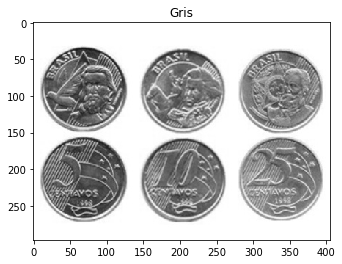

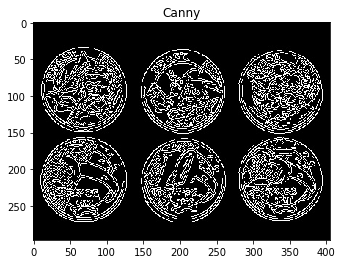

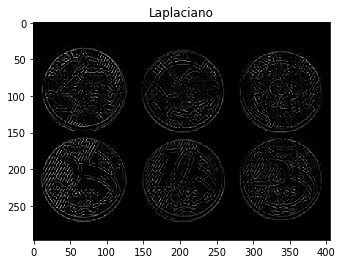

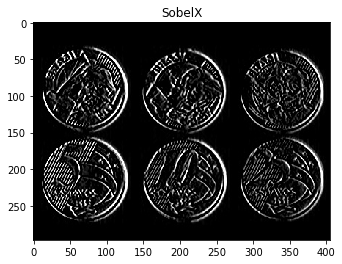

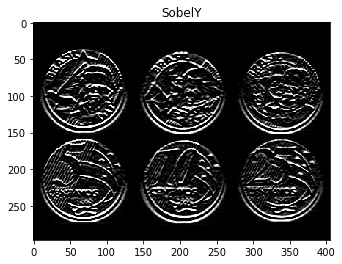

In [22]:
p1Bordes('p1/', 'coins.png', 'coins')

En la siguiente tabla se armará un listado de las diferencias entre las operaciones y algoritmos arriba realizados

<table style="width:80%">
    <tr>
        <th></th>
        <th>Sobel</th>
        <th>Laplaciano</th>
        <th>Canny</th>
    </tr>
    <tr>
        <td><b>Tipo</b></td>
        <td>Operador</td>
        <td>Operador</td>
        <td>Algoritmo</td>
    </tr>
    <tr>
        <td><b>Uso</b></td>
        <td>Aplicación de filtros sobre la imagen</td>
        <td>Aplicación de un filtro sobre la imagen</td>
        <td>Serie de pasos para detectar los bordes ya binarizados</td>
    </tr>
    <tr>
        <td><b>Descripción</b></td>
        <td>Da una aproximación de la primera derivada. Da un valor de 0 cuando no hay gradiente presente. Devuelve dos imagenes al aplicar dos filtros (kernels): uno con los bordes horizontales y otro con los verticales</td>
        <td>Da una aproximación de la segunda derivada. A diferencia de Sobel, usa una sola pasada para hacer la detección ya que solo necesita un kernel.</td>
        <td>No es un perador sencillo. Basa su resultado en reaizar previamente un filtrado de ruido, luego aplicar un operador (Sobel o Laplaciano) y luego una binarización inteligente con un umbral dinámico.</td>
    </tr>
    <tr>
        <td><b>Ventajas y desventajas</b></td>
        <td>
            <ul>
                <li>Es un operador rápido y de bajo costo computacional</li>
                <li>Reduce el ruido al mismo tiempo que aplica el filtro de gradiente</li>
            </ul>        
        </td>
        <td>
            <ul>
                <li>Aplica un solo kernel en una sola pasada para obtener su resultado</li>
                <li>Por el manejo de la segunda derivada, es altamente sensible al ruido, por lo que se sugiere suavizar primero</li>
            </ul>
        </td>
        <td>
            <ul>
                <li>Algoritmo ampliamente usado por lo que ya existen implementaciones sencillas de llamar</li>
                <li>Detección "inteligente" de bordes al definir un umbral mínimo y máximo para el resultado binarizado</li>
            </ul>   
        </td>
    </tr>
</table>

## Problema 2
Investigue cuál es la diferencia entre un borde y un contorno en OpenCV, posteriormente a esto, determine los bordes y contornos de una misma imagen, para este ejercicio deberá entregar un documento con la descripción de la diferencia entre ambos enfoques y el resultado de obtener ambos resultados para cualquier imagen que usted desee.

### Bordes y contornos
Los bordes son cambios de intensidad pronunciados. Sin embargo, un contorno es una curva de puntos sin huecos ni saltos es decir, tiene un principio y el final de la curva termina en ese principio.

<img src="p2/bordes-contornos.png">

Un contorno es una curva que une todos los puntos continuos en una imagen (a lo largo de los bordes), que tienen el mismo color o intensidad. OpenCV utiliza la primera derivada de la intensidad de una imagen para detectar bordes. Y los el resultado de los algoritmos para detectar bordes (como el de Canny) son la entrada de los algoritmos para detectar contornos.

### Implementación
Se definirá una función que detecte bordes y otra función de detección de contornos. Se mostrará la salida de ambas funciones. Hay que aclarar que Canny también servirá como paso previo para mostrar los contornos.

In [10]:
def p2Canny(carpeta, imagen, resultado, umbralMin=50, umbralMax=150):
    #Leer imagen en escala de grises
    img = cv2.imread(carpeta + imagen, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Detectar bordes con Canny
    canny = cv2.Canny(gray, umbralMin, umbralMax)
        
    #Guardar resultado y mostrarlo
    cv2.imwrite(carpeta + resultado + '.jpg', canny)
    imagen_salida = cv2.imread(carpeta + resultado + '.jpg')
    #imagen_salida = cv2.cvtColor(imagen_salida, cv2.COLOR_BGR2RGB)
    plt.imshow(imagen_salida)
    plt.show()

In [20]:
def p2Contornos(carpeta, imagen, resultado, umbralMin=50, umbralMax=150):
     #Leer imagen en escala de grises
    img = cv2.imread(carpeta + imagen, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Suavizar con filtro gaussiano
    gauss = cv2.GaussianBlur(gray, (5,5), 0)
    
    #Detectar bordes con Canny
    canny = cv2.Canny(gauss, umbralMin, umbralMax)
    
    #Busqueda de contornos
    _, contornos, _ = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    #Dibujar contornos sobre imagen original
    original_contornos = cv2.drawContours(img, contornos,-1,(255,0,0), 2)
    
    #Guardar resultado y mostrarlo
    cv2.imwrite(carpeta + resultado + '.jpg', original_contornos)
    imagen_salida = cv2.imread(carpeta + resultado + '.jpg')
    imagen_salida = cv2.cvtColor(imagen_salida, cv2.COLOR_BGR2RGB)
    plt.imshow(imagen_salida)
    plt.show()

#### Bordes


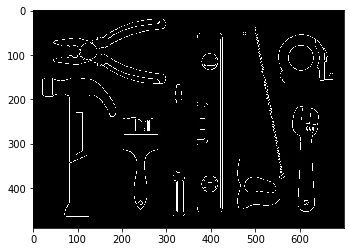

In [4]:
p2Canny('p2/', 'tools.jpg', 'cannyToos')

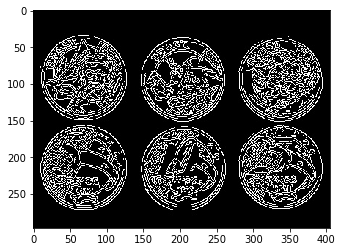

In [16]:
p2Canny('p2/', 'coins.png', 'cannyCoins')

#### Contornos

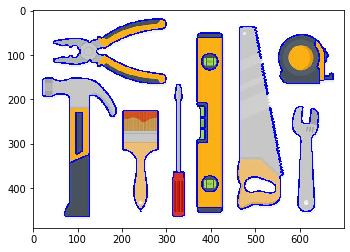

In [21]:
p2Contornos('p2/', 'tools.jpg', 'contornosToos')

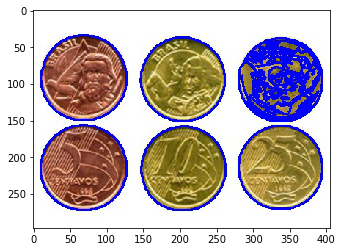

In [22]:
p2Contornos('p2/', 'coins.png', 'contornosCoins')

## Problema 3
Dadas las imágenes en la carpeta llamada _campos_ utilice la transformada de Hough para dibujar la mayor cantidad de líneas rectas posibles en cada imagen, para este ejercicio puede utilizar las funciones de OpenCV disponibles sobre la transformada de Hough.

In [19]:
def p3Hough(carpeta, imagen, resultado, umbral=100, minLine=10, maxGap=250):
    #Leer imagen en escala de grises
    img = cv2.imread(carpeta + imagen, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Detectar bordes con Canny
    edges = cv2.Canny(gray, 50, 200)
    
    #Detectar líneas con Hough
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, umbral, minLineLength=minLine, maxLineGap=maxGap)
    
    #Dibujar las líneas sobre la imagen original
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        
    #Guardar resultado y mostrarlo
    cv2.imwrite(carpeta + resultado + '.jpg', img)
    imagen_salida = cv2.imread(carpeta + resultado + '.jpg')
    imagen_salida = cv2.cvtColor(imagen_salida, cv2.COLOR_BGR2RGB)
    plt.imshow(imagen_salida)
    plt.show()

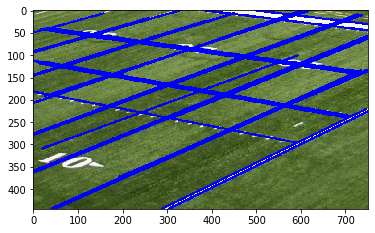

In [6]:
p3Hough('campos/', 'campo1.jpg', 'campo1Hough')

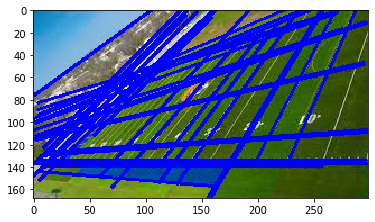

In [20]:
p3Hough('campos/', 'campo2.jpg', 'campo2Hough', umbral=80)

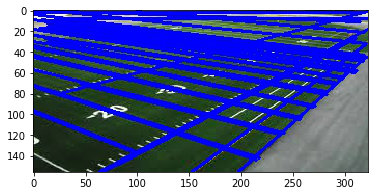

In [25]:
p3Hough('campos/', 'campo3.jpg', 'campo3Hough', umbral=90)